# Lww Algorithm

### Implementation

This Python code defines a class called LzwAlgorithm that implements the lzw compression algorithm. The class has three methods:

 - `encode` method takes a string text as input and returns a tuple containing a list of integers and a dictionary. The list of integers represents the compressed text, and the dictionary maps the substrings to their corresponding integers.
 - `decode` method takes a list of integers lst and a dictionary dictionary as input and returns the decoded string.
 
  

In [1]:
from typing import Tuple, List, Dict

class LzwAlgorithm():
    """
    LzAlgorithms class
    """
    @staticmethod
    def encode(text: str) -> Tuple[List[int], Dict[str, int]]:
        """
        Encodes the input string `text` using the Lempel-Ziv-Welch algorithm.

        Args:
            text: str - The input string to be encoded.
        
        Returns:
            Tuple[List[int], Dict[str:int]]: A tuple containing the list of
        integers that represents the compressed `text`, and a dictionary
        that maps the substrings to their corresponding integers.
        
        Example:
        >>> lzw_encode('ABBABABBAABABA')
        ([0, 1, 1, 2, 2, 4, 5, 4], \
    {'A': 0, 'B': 1, 'AB': 2, 'BB': 3, 'BA': 4, 'ABA': 5, 'ABB': 6, 'BAA': 7, 'ABAB': 8})
        """
        dictionary = dict()
        idx = 0
        result = []
        for letter in sorted(text):
            if letter not in dictionary:
                dictionary[letter] = idx
                idx += 1
        founded_letters = text[0]
        for i in range(1, len(text)):
            l = founded_letters + text[i]
            if l in dictionary:
                founded_letters = l
            else:
                result.append(dictionary[founded_letters])
                founded_letters = text[i]
                dictionary[l] = idx
                idx += 1
        if founded_letters:
            result.append(dictionary[founded_letters])
        return result, dictionary

    @staticmethod
    def decode(lst: List[int], dictionary: Dict[str, int]) -> str:
        """
        Decodes the compressed sequence of integers
        `lst` using the dictionary `d` generated by
        the Lempel-Ziv-Welch algorithm.

        Args:
            lst: List[int] - The list of integers to
            be decoded.
            dictionary: Dict[str:int] - The dictionary generated
            by the Lempel-Ziv-Welch algorithm.
        
        Returns:
            str - The decoded string.

        Example:
        >>> lzw_decode([65, 66, 67, 68, 69], {'A': 65, 'B': 66, 'C': 67, 'D': 68, 'E': 69})
        'ABCDE'
        """
        result = ""
        for num in lst:
            result += list(dictionary.keys())[list(dictionary.values()).index(num)]
        return result

### How it is working

In [5]:
#Create text for encoding
text = 'abarfkoeflepfepkaijdiefjeopqjsndajndjahajhajdahajfhdjeokfeofepp'
#Get encoded list and dictionary from encode() function
encoded, dictionary = LzwAlgorithm.encode(text)
#Compare initial text with decoded one
LzwAlgorithm.decode(encoded, dictionary) == text

True

### Testing

In [6]:
#import libraries for testing an algorithm
import matplotlib.pyplot as plt
import time

In [7]:
#List of file pathes which are containing text for testing
file_pathes = ['text_files/small_text.txt', 'text_files/middlesize_text.txt', 'text_files/big_text.txt']

In [13]:
def test_lzw(files: List[str]):
    time_taken = []
    length = []
    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
            length.append(len(data))
            start = time.time()
            LzwAlgorithm.encode(data)
            end = time.time()
            time_taken.append(end - start)
    plt.xlabel('Text length')
    plt.ylabel('Time taken')
    x = length
    y = time_taken
    plt.plot(x, y)

#### Small file

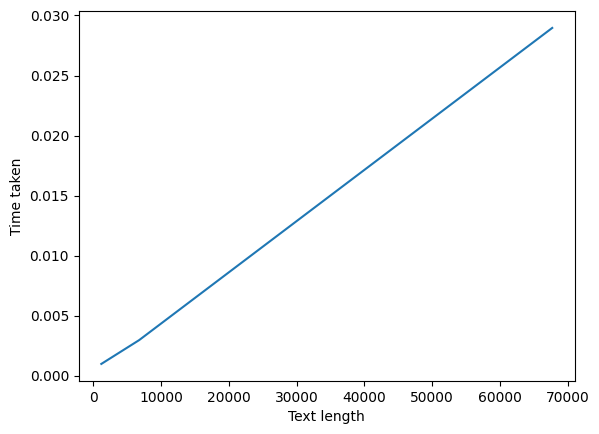

In [14]:
test_lzw(file_pathes)

### Conclusion

The Lempel-Ziv-Welch (LZW) algorithm is a popular lossless data compression algorithm that is widely used in various applications, including image and video compression, file compression, and network protocols. It is particularly effective for compressing data with repetitive patterns, such as text files, DNA sequences, and images with regions of uniform color.

LZW algorithm works best on data with high redundancy, such as text files, because it can exploit the repeating patterns in the data to achieve high compression ratios.